<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/LinearSystemStabilityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

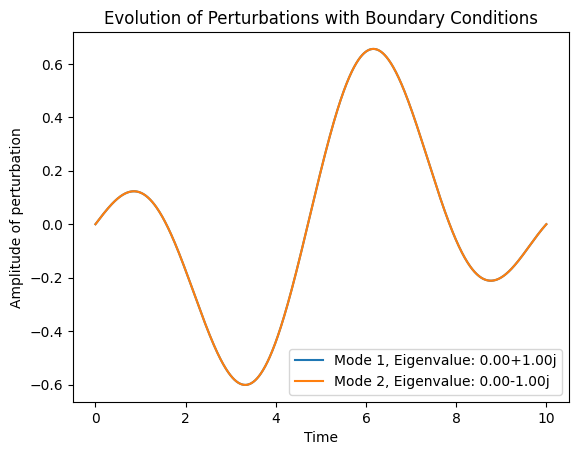

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = np.array([[0, 1], [-1, 0]])
x0 = np.array([1, 0])
time = np.linspace(0, 10, 1000)

def apply_boundary_conditions(x, t, T=10):
    return x * np.sin(np.pi * t/T)

eigenvalues, eigenvectors = np.linalg.eig(L)

# Iterate over each eigenvalue and associated eigenvector
for i, (eigenvalue, eigenvector) in enumerate(zip(eigenvalues, eigenvectors.T)):
    # Placeholder for x_t which will store time evolution for each mode
    x_t = np.zeros_like(time, dtype=np.complex_)
    for t_idx, t in enumerate(time):
        # Explicit time evolution of x using each mode
        x_t[t_idx] = np.dot(x0, eigenvector) * np.exp(eigenvalue * t)
    # Apply boundary conditions
    x_t_bc = apply_boundary_conditions(x_t, time)
    # Plot the real part of the solution, since we have complex numbers involved
    plt.plot(time, x_t_bc.real, label=f'Mode {i+1}, Eigenvalue: {eigenvalue:.2f}')

plt.xlabel('Time')
plt.ylabel('Amplitude of perturbation')
plt.title('Evolution of Perturbations with Boundary Conditions')
plt.legend()
plt.show()



This code snippet appears to solve a system of ordinary differential equations (ODEs) of the form:

\[ \frac{d\vec{x}}{dt} = L\vec{x} \]

where \( \vec{x} \) is a state vector, and \( L \) is a 2x2 matrix provided in the code. The eigenvalues and eigenvectors of the matrix \( L \) are computed using NumPy's `eig` function. The eigenvalues and eigenvectors are then used to explore the time evolution of a system's state \(\vec{x}\) under the assumption that the solution can be expressed as a sum of modes of the form:

\[ \vec{x}(t) = \vec{x}(0) e^{\lambda t} \]

where \( \lambda \) is an eigenvalue of \( L \).

Here’s a breakdown of the code:

- **Definition of Matrix L and Initial State x0:** This matrix and vector determine the dynamical system being analyzed.
  
  \[ L = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}, \quad \vec{x_0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \]

- **Eigenvalue and Eigenvector Calculation:** Eigenvalues and eigenvectors describe the modes of the system. In the context of stability analysis, the sign of the real part of eigenvalues informs about stability (positive: unstable, negative: stable, zero: marginally stable/neutrally stable).

- **Iterative Time Evolution and Plotting:** The loop over `time` computes the system state \(\vec{x}(t)\) at each time point and plots it. The application of boundary conditions via `apply_boundary_conditions` seems to multiply the evolved state by a sinusoidal function, which can modulate the amplitude of the perturbations over time.

\[ \vec{x}(t) = \vec{x}(t) \sin\left(\frac{\pi t}{T}\right) \]

- **Visualization:** The real part of the time-evolved state is plotted for each eigenmode, providing a visualization of how different modes (associated with the eigenvalues and eigenvectors of \( L \)) evolve over time and are modulated by the boundary condition.

To offer more specifics: The matrix \( L \) is

\[ L = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \]

Its eigenvalues are complex: \( 0 + i \) and \( 0 - i \). Therefore, the system exhibits oscillatory behavior, which is depicted in the resulting plot showing sinusoidal evolution of the state variable \( \vec{x}(t) \). Note that the choice of matrix \( L \), initial conditions, and boundary conditions are quite general and not directly associated with a physical system such as MHD stability. This code is rather a generic example of exploring the time evolution of linear systems and applying a specific form of boundary condition.
